In [1]:
import os
import shutil
from tqdm import tqdm
from random import shuffle
import cv2
import numpy as np

TRAIN_HOT_DOG_DIR = "hot-dog-not-hot-dog/train/hot_dog"
TRAIN_NOT_HOT_DOG_DIR = "hot-dog-not-hot-dog/train/not_hot_dog"

TEST_HOT_DOG_DIR = "hot-dog-not-hot-dog/test/hot_dog"
TEST_NOT_HOT_DOG_DIR = "hot-dog-not-hot-dog/test/not_hot_dog"

IMAGE_SIZE = 72
LR = 1e-5
MODEL_NAME = "hot-dog-not-hot-dog_{}".format("version-1")

In [2]:
print("Total training hot dogs: ",len(os.listdir(TRAIN_HOT_DOG_DIR)))
print("Total training not hot dogs: ",len(os.listdir(TRAIN_NOT_HOT_DOG_DIR)))

Total training hot dogs:  1673
Total training not hot dogs:  1308


In [3]:
def balance_data():
    count=0
    for img in tqdm(os.listdir(TRAIN_HOT_DOG_DIR)):
        if count>=1300:
            os.unlink(os.path.join(TRAIN_HOT_DOG_DIR,img))
            count=count+1
        else:
            count=count+1
            
    count=0
    for img in tqdm(os.listdir(TRAIN_NOT_HOT_DOG_DIR)):
        if count>=1300:
            os.unlink(os.path.join(TRAIN_NOT_HOT_DOG_DIR,img))
            count=count+1
        else:
            count=count+1
            
balance_data()

100%|██████████| 1308/1308 [00:00<00:00, 356799.53it/s]


In [4]:
print("Total training hot dogs: ",len(os.listdir(TRAIN_HOT_DOG_DIR)))
print("Total training not hot dogs: ",len(os.listdir(TRAIN_NOT_HOT_DOG_DIR)))
print("Total testing hot dogs: ",len(os.listdir(TEST_HOT_DOG_DIR)))
print("Total testing not hot dogs: ",len(os.listdir(TEST_NOT_HOT_DOG_DIR)))

Total training hot dogs:  1300
Total training not hot dogs:  1300
Total testing hot dogs:  250
Total testing not hot dogs:  250


In [5]:
def create_train_data():
    
    #hot-dog = [1,0]
    #not-hot-dog = [0,1]
    
    training_data = []
    for img in tqdm(os.listdir(TRAIN_HOT_DOG_DIR)):
        label = [1,0]
        path = os.path.join(TRAIN_HOT_DOG_DIR, img)
        if os.path.exists(path):
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                training_data.append([np.array(img), np.array(label)])
    
    for img in tqdm(os.listdir(TRAIN_NOT_HOT_DOG_DIR)):
        label = [0,1]
        path = os.path.join(TRAIN_NOT_HOT_DOG_DIR, img)
        if os.path.exists(path):
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                training_data.append([np.array(img), np.array(label)])
    
    shuffle(training_data)
    return training_data

In [6]:
def create_validation_and_test_data():
    
    #hot-dog = [1,0]
    #not-hot-dog = [0,1]
    
    count=0
    testing_data = []
    validation_data = []
    for img in tqdm(os.listdir(TEST_HOT_DOG_DIR)):
        if count<200:
            label = [1,0]
            path = os.path.join(TEST_HOT_DOG_DIR, img)
            if os.path.exists(path):
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                    validation_data.append([np.array(img), np.array(label)])
            count=count+1
        else:
            label = [1,0]
            path = os.path.join(TEST_HOT_DOG_DIR, img)
            if os.path.exists(path):
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                    testing_data.append([np.array(img), np.array(label)])
            count=count+1
            
    count=0
    for img in tqdm(os.listdir(TEST_NOT_HOT_DOG_DIR)):
        if count<200:
            label = [0,1]
            path = os.path.join(TEST_NOT_HOT_DOG_DIR, img)
            if os.path.exists(path):
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                    validation_data.append([np.array(img), np.array(label)])
            count=count+1
        else:
            label = [0,1]
            path = os.path.join(TEST_NOT_HOT_DOG_DIR, img)
            if os.path.exists(path):
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
                    testing_data.append([np.array(img), np.array(label)])
            count=count+1
    
    shuffle(testing_data)
    shuffle(validation_data)
    return [validation_data, testing_data]

In [7]:
train_data = create_train_data()
np.save("train_data.npy",train_data)

100%|██████████| 1300/1300 [00:05<00:00, 219.94it/s]


In [8]:
data = create_validation_and_test_data()
validation_data = data[0]
test_data = data[1]
np.save("validation_data.npy",data[0])
np.save("test_data.npy",data[1])

100%|██████████| 250/250 [00:01<00:00, 225.83it/s]


In [9]:
print("Total training data: ",len(train_data))
print("Total validation data: ",len(validation_data))
print("Total testing data: ",len(test_data))

Total training data:  2530
Total validation data:  400
Total testing data:  100


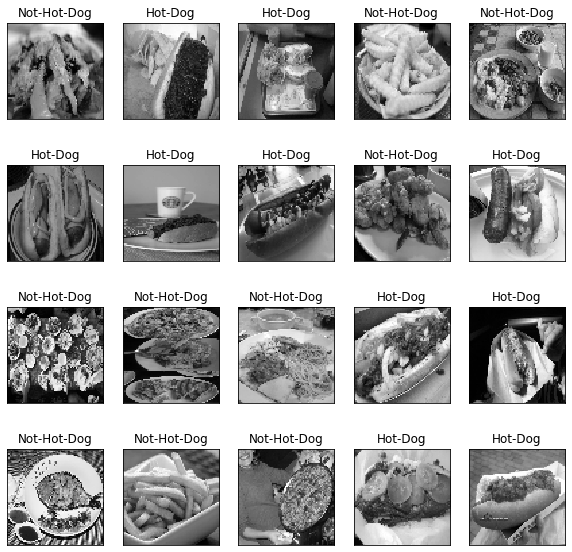

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))

for num, img_data in enumerate(train_data[:20]):
    img = img_data[0]
    img_label = img_data[1]
    y = fig.add_subplot(4,5,num+1)
    if img_label[0] == 1:
        str = "Hot-Dog"
    else:
        str = "Not-Hot-Dog"
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
    y.imshow(img,cmap='gray')
    plt.title(str)
plt.show()

In [ ]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMAGE_SIZE, IMAGE_SIZE, 1], name="input")

convnet = conv_2d(convnet, nb_filter=32, filter_size=5, activation="relu", strides=1, padding="same")
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, nb_filter=64, filter_size=5, activation="relu", strides=1, padding="same")
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, nb_filter=128, filter_size=5, activation="relu", strides=1, padding="same")
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, nb_filter=64, filter_size=5, activation="relu", strides=1, padding="same")
convnet = max_pool_2d(convnet, 3)

convnet = fully_connected(convnet, 1024, activation="relu")
convnet = dropout(convnet, 0.5)

convnet = fully_connected(convnet, 2, activation="softmax")
convnet = regression(convnet, optimizer="rmsprop", learning_rate=LR, loss="categorical_crossentropy", name="targets")

model = tflearn.DNN(convnet, tensorboard_dir="log")

In [ ]:
X = np.array([i[0] for i in train_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
Y = np.array([i[1] for i in train_data])

validation_x = np.array([i[0] for i in validation_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
validation_y = np.array([i[1] for i in validation_data])


print(X.shape)
print(Y.shape)
print(validation_x.shape)
print(validation_y.shape)

In [ ]:
model.fit({"input": X}, 
          {"targets": Y},
          n_epoch=5,
          validation_set=({"input": validation_x}, {"targets": validation_y}),
          show_metric=True, run_id=MODEL_NAME)

In [ ]:
model.save(MODEL_NAME)

In [ ]:
fig1 = plt.figure(figsize=(15,15))

for num, img_data in enumerate(test_data[-12:]):
    img = img_data[0]
    img_label = img_data[1]
    data = img.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)
    model_out = model.predict([data])[0]
    print(model_out)
    y = fig1.add_subplot(3,4,num+1)
    if np.argmax(model_out) == 0:
        str = "Hot-Dog"
    else:
        str = "Not-Hot-Dog"
    
    if img_label[0] == 1:
        str1 = "Hot-Dog"
    else:
        str1 = "Not-Hot-Dog"
    
    y.imshow(img,cmap='gray')
    plt.title("P: "+str+" A: "+str1)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    